In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('newspaper_data.tsv',sep='\t')

In [ ]:
x = data['Daily'].values
y = data['Sunday '].values

In [ ]:
x

array([ 391.952,  516.981,  355.628,  238.555,  537.78 ,  733.775,
        198.832,  252.624,  206.204,  231.177,  449.755,  288.571,
        185.736, 1164.388,  444.581,  412.871,  272.28 ,  781.796,
       1209.225,  825.512,  223.748,  354.843,  515.523,  220.465,
        337.672,  197.12 ,  133.239,  374.009,  273.844,  570.364,
        391.286,  201.86 ,  321.626,  838.902])

In [ ]:
y

array([ 488.506,  798.298,  235.084,  299.451,  559.093, 1133.249,
        348.744,  417.779,  344.522,  323.084,  620.752,  423.305,
        202.614, 1531.527,  553.479,  685.975,  324.241,  983.24 ,
       1762.015,  960.308,  284.611,  407.76 ,  982.663,  557.   ,
        440.923,  268.06 ,  262.048,  432.502,  338.355,  704.322,
        585.681,  267.781,  408.343, 1165.567])

In [ ]:
# w = slope, b = intercept
class LinearRegression:
    def __init__(self):
        self.w = 0
        self.b = 0

    def update_weights(self,x,y):
        return np.dot(x.T,y)/np.dot(x.T,x)

    def fit(self,x,y):
        self.w = self.update_weights(x,y)
        self.b = np.mean(y)- self.w*np.mean(x)

    def predict(self,x):
        return self.w*x + self.b

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(x,y)

In [ ]:
linear_reg.w

1.3629997737529689

In [ ]:
data_test = pd.read_csv('newspaper_data_test.tsv',sep='\t')
x_test = data_test['Daily'].values
data_test.head()

,Sno,Newspaper,Daily
0,0,Baltimore Sun,399.297
1,1,Boston Globe,526.642
2,2,Boston Herald,362.315
3,3,Charlotte Observer,243.016
4,4,Chicago Sun Times,547.688


In [ ]:
x_test

array([ 399.297,  526.642,  362.315,  243.016,  547.688,  747.401,
        202.617,  257.34 ,  209.993,  235.337,  457.687,  293.657,
        188.955, 1184.007,  452.648,  420.362,  277.201,  795.607,
       1231.58 ,  836.858,  227.097,  360.007,  523.01 ,  223.792,
        342.585,  199.965,  135.057,  376.789,  275.84 ,  574.237,
        394.103,  203.263,  322.517,  838.902])

In [ ]:
preds_test = linear_reg.predict(x_test)

In [ ]:
print('Model Parameters')
print(f'Slope m = {linear_reg.w}')
print(f'Intercept b = {linear_reg.b}')

Model Parameters
Slope m = 1.3629997737529689
Intercept b = 3.800661856920783


In [ ]:
companies_to_include = []
for i, row in data_test.iterrows():

    if preds_test[i]>row['Daily']+.3*row['Daily']:
        companies_to_include.append(row['Newspaper'])


print("\nCompanies to Include from Sunday Edition Circulation:")
for i in companies_to_include:
    print(i)


Companies to Include from Sunday Edition Circulation:
Baltimore Sun
Boston Globe
Boston Herald
Charlotte Observer
Chicago Sun Times
Chicago Tribune
Cincinnati Enquirer
Denver Post
Des Moines Register
Hartford Courant
Houston Chronicle
Kansas City Star
Los Angeles Daily News
Los Angeles Times
Miami Herald
Minneapolis Star Tribune
New Orleans Times-Picayune
New York Daily News
New York Times
Newsday
Omaha World Herald
Orange County Register
Philadelphia Inquirer
Pittsburgh Press
Portland Oregonian
Providence Journal-Bulletin
Rochester Democrat & Chronicle
Rocky Mountain News
Sacramento Bee
San Francisco Chronicle
St. Louis Post-Dispatch
St. Paul Pioneer Press
Tampa Tribune
Washington Post


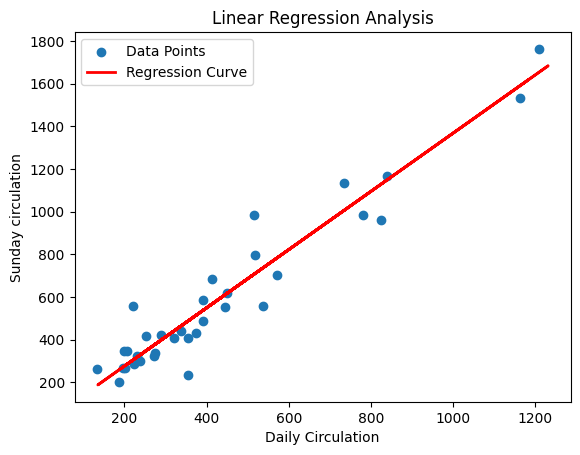

In [ ]:
# Plot the data and the predicted regression curve
plt.scatter(x, y, label='Data Points')
plt.plot(x_test, preds_test, color='red', linewidth=2, label='Regression Curve')
plt.xlabel('Daily Circulation')
plt.ylabel('Sunday circulation')
plt.title('Linear Regression Analysis')
plt.legend()
plt.show()
